### Name: Riya Malhotra
### Assignment -2

## Read in the appropriate packages

In [1]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.4 MB/s eta 0:00:00


In [2]:
from pandas_datareader import data as pdr #read data from yahoo finance api
import matplotlib.pyplot as plt #viz #GUI manager
import seaborn as sns #viz #plotly is another package
import datetime
import pandas as pd
import numpy as np
from pandas import Grouper #groupby
#statistical data exploration, conducting statistical tests, and estimation of different statistical models
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #autocorrelation plot
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # double and triple exponential smoothing
from pandas.plotting import autocorrelation_plot #autocorrelation plot
from statsmodels.graphics.gofplots import qqplot #residual diagnostics
from sklearn.metrics import mean_squared_error #accuracy metrics
from math import sqrt
from sklearn.metrics import mean_absolute_error #accuracy metrics

from random import gauss #create gaussian white noise
from random import seed
from pandas import Series

from statsmodels.tsa.stattools import adfuller # Augmented Dickey Fuller test for testing stationarity

from statsmodels.tsa.arima_model import ARIMA #for manual ARIMA

import pmdarima as pm #auto arima


# Assignment - 2

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Read in the monthly anti-diabetic drug sales in Australia dataset

Download the data from the the gdrive: https://drive.google.com/file/d/1ICOlwDsVnwMPxUTEdwkZ14iCTrRZbBUS/view?usp=drive_link

In [6]:
drug_sales_df = pd.read_csv('/content/drive/MyDrive/Time Series-Class/RM_drug_sales_australia.csv',
                            parse_dates=['date'],
                            index_col=['date'])
drug_sales_df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


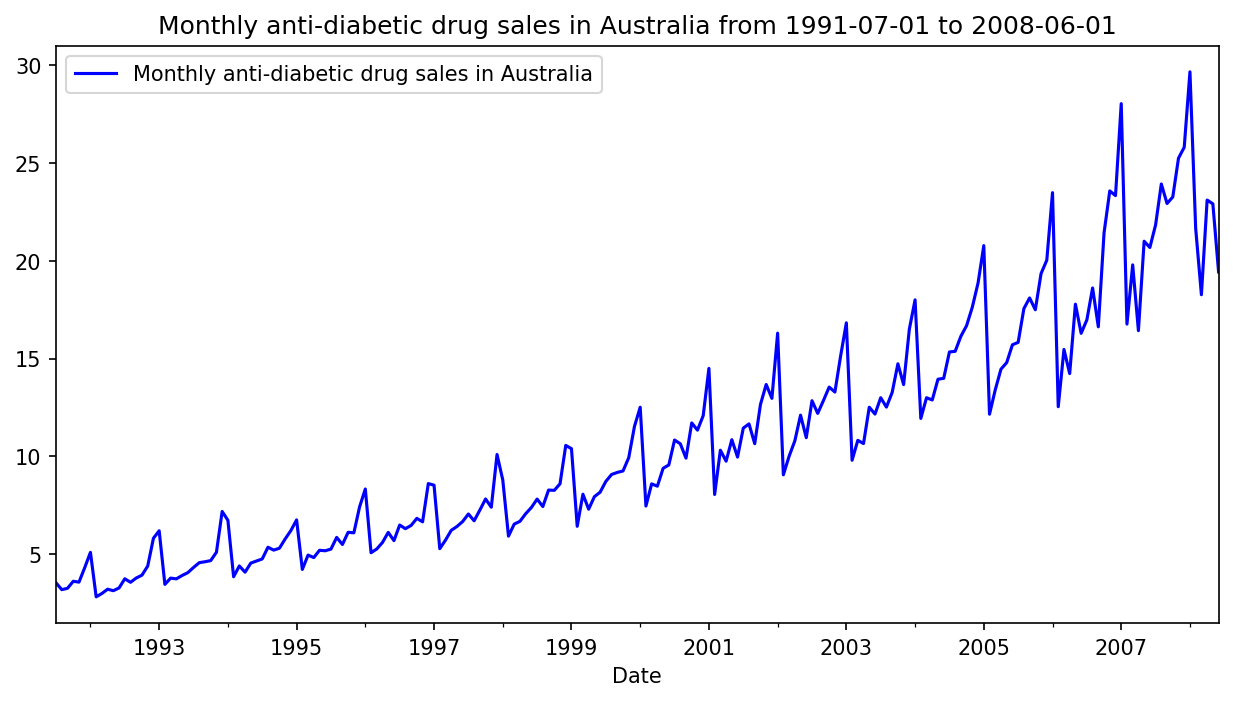

In [42]:
# Monthly Anti-Drug Sales in Australia and Visualzing the Series

# to set the plot size
plt.figure(figsize=(10, 5), dpi=150) #dpi = resolution. default 100.

# in plot method we set the label and color of the curve.
drug_sales_df['value'].plot(label='Monthly anti-diabetic drug sales in Australia', color='blue')

# adding title to the plot
plt.title('Monthly anti-diabetic drug sales in Australia from {} to {}'.format('1991-07-01', '2008-06-01'))

# adding Label to the x-axis
plt.xlabel('Date')

# adding legend to the curve
plt.legend()


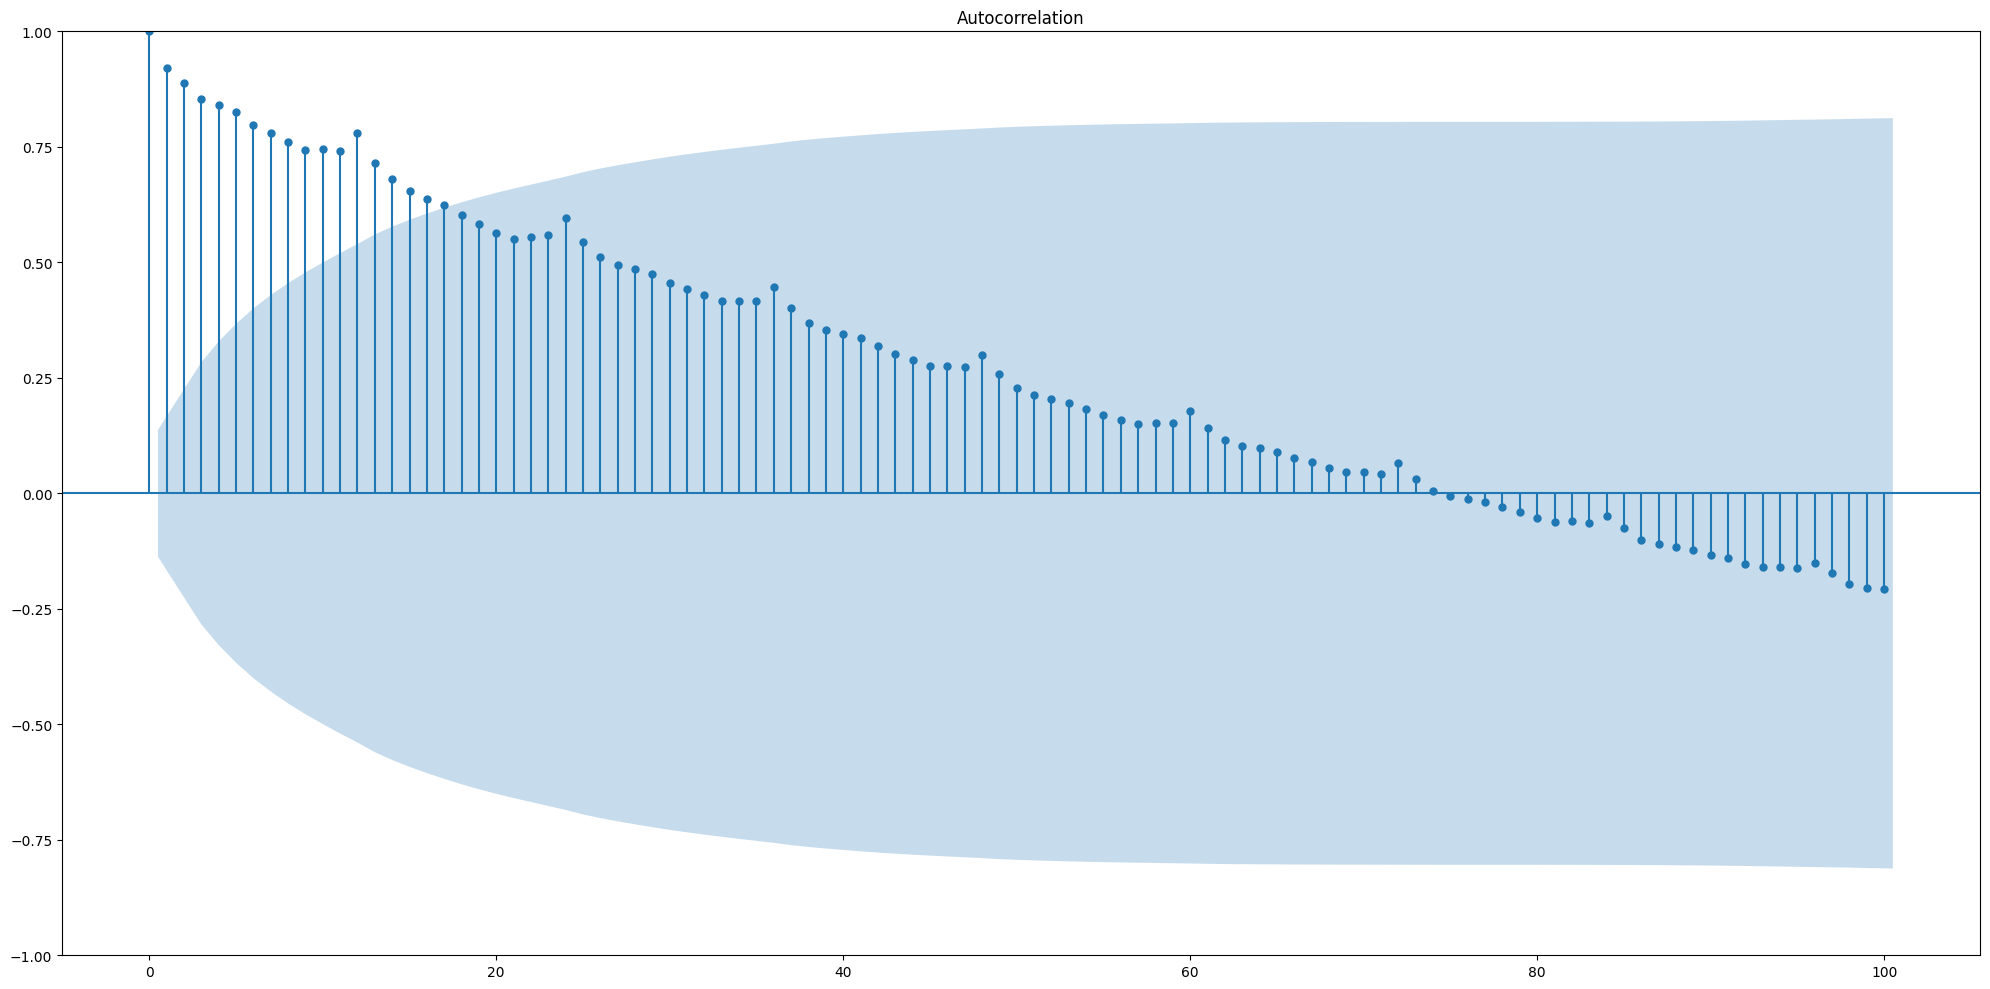

In [43]:
#Autocorrelation plot
#check if the data is stationary

fig = plot_acf(drug_sales_df, lags=100)
fig.set_size_inches((20, 10))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [ ]:
#data has trend as well as seasonlity of 12 months

## Unit Root Test - Augmented Dickey-Fuller (ADF) statistical test to check stationarity

In [44]:
X = drug_sales_df.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 3.145186
p-value: 1.000000
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


Running the test prints the test statistic value of 3.14. The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset). As part of the output, we get a look-up table to help determine the ADF statistic. We can see that our statistic value of 3.14 is greater than the value of -2.87 at 5%. Also, the p-value is greater than 0.05.

This suggests that we fail to reject the null hypothesis with a significance level of 5%. Failing to reject the null hypothesis means that the process a unit root, and in turn that the time series is non-stationary.

## Differencing

One of the best ways to make a non-stationary time series stationary — compute the differences between consecutive observations. This is known as differencing.

Transformations such as logarithms can help to stabilise the variance of a time series. Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

<Axes: xlabel='date'>

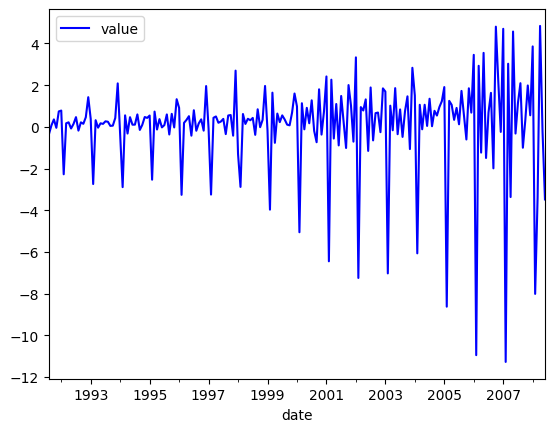

In [45]:
#create differenced dataset
first_diff_df = drug_sales_df.diff().dropna()
first_diff_df.plot(color='blue')

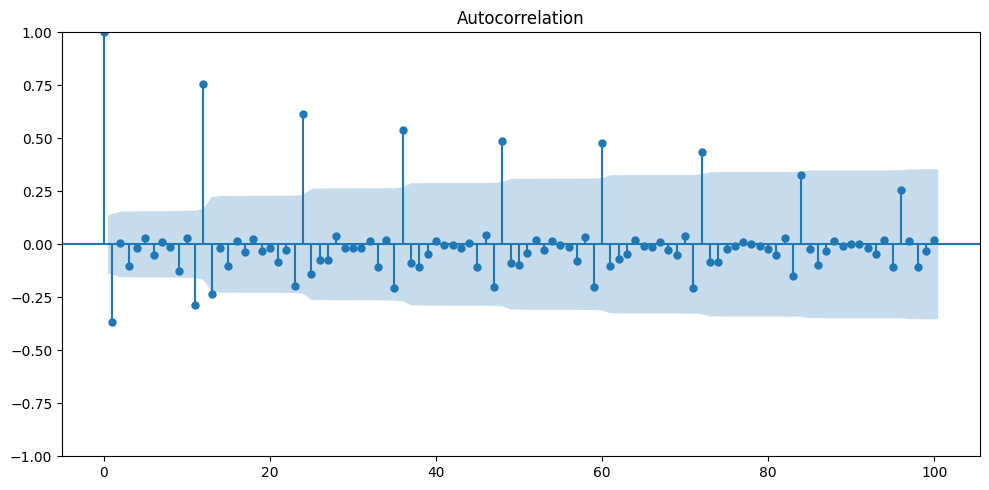

In [95]:
# autocorrelation plot of differenced dataset
fig = plot_acf(first_diff_df, lags=100)
fig.set_size_inches((10, 5))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [47]:
X = first_diff_df.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.495172
p-value: 0.116653
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


From the ACF and line plot and the ADF test p-value we can deduce that the series is non-stationary. As we can see a seasonal pattern, let us apply seasonal differencing.

### Stationary - Seasonality

<Axes: xlabel='date'>

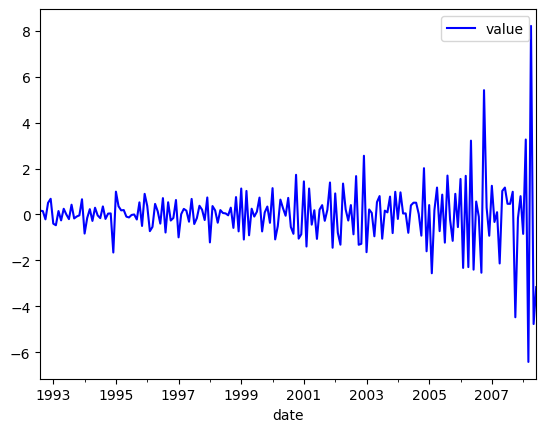

In [48]:
seasonal_diff_df = first_diff_df.diff(12).dropna()
seasonal_diff_df.plot(color = 'blue')

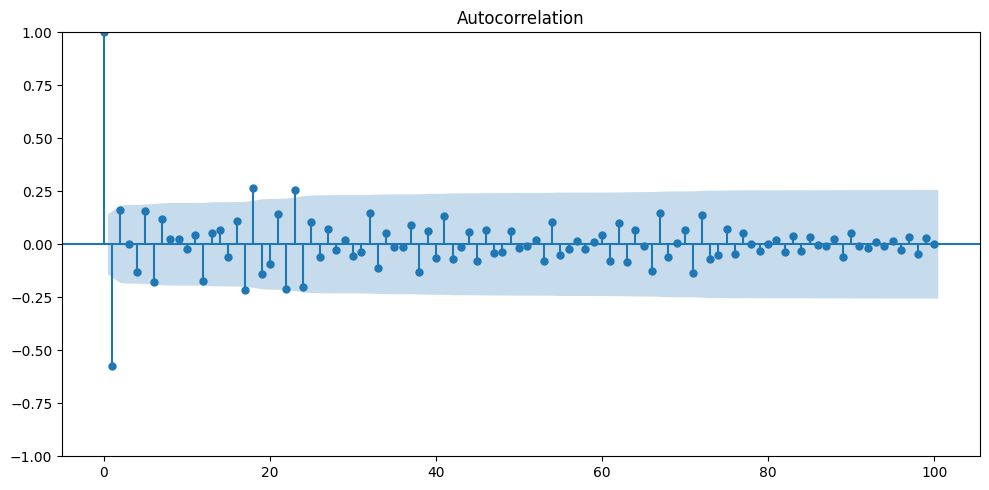

In [49]:
# autocorrelation plot of the seasonaly differenced dataset
fig = plot_acf(seasonal_diff_df, lags=100)
fig.set_size_inches((10, 5))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [50]:
X = seasonal_diff_df.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.783440
p-value: 0.000058
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576


Since p-value is less than 0.05 we can reject the null hypothesis and the data is stationary.

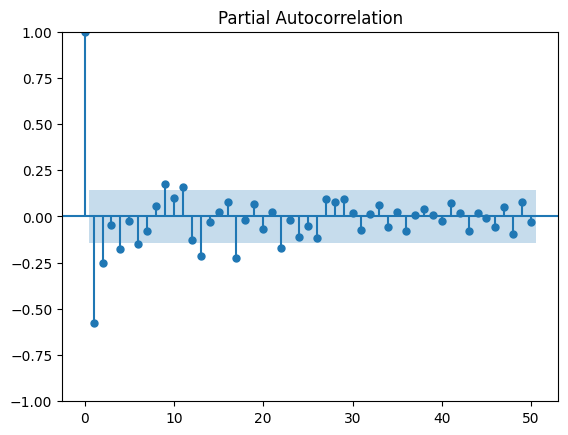

In [93]:
plot_pacf(seasonal_diff_df, lags=50)
fig.set_size_inches((10, 5))
plt.show()

## Backtesting Period & ETS Model

In [94]:
drug_sales_df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [112]:
#Montghly Frequency
drug_sales_df = drug_sales_df.asfreq('MS')

# Define backtest periods
backtest_periods = [
    ('2004-07-01', '2005-06-01'),
    ('2005-07-01', '2006-06-01'),
    ('2006-07-01', '2007-06-01'),
    ('2007-07-01', '2008-06-01')
]

import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Function to fit ETS models and forecast
def fit_arima_model(train_data, test_data, test_data_index, seasonal=True):
    if seasonal:
        smodel = pm.auto_arima(train_data, seasonal=True, m=12, stepwise=True, suppress_warnings=True)
    else:
        smodel = pm.auto_arima(train_data, seasonal=False, stepwise=True, suppress_warnings=True)

    forecast_scaled = smodel.predict(n_periods=len(test_data))

    # Reshape and inverse transform the forecast
    forecast = scaler.inverse_transform(forecast_scaled.reshape(-1, 1)).flatten()

    # Return a pandas Series for compatibility, using the original test_data_index
    return pd.Series(forecast, index=test_data_index)


# Function to process one backtest period
# Process one backtest period
def process_backtest_period(start, end, idx):
    print(f"\n=== Backtest Period {idx}: {start} to {end} ===")

    # Split the data
    train_data, test_data = split_data(drug_sales_df, start, end)

    # Initialize metrics DataFrame for this period
    metrics_dataframe = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'MAPE'])

    # Scale the data
    scaler.fit(train_data[['value']])
    train_scaled = scaler.transform(train_data[['value']].values.reshape(-1, 1)).flatten()
    test_scaled = scaler.transform(test_data[['value']].values.reshape(-1, 1)).flatten()

    print(f"Scaled Train Data Range: min={train_scaled.min()}, max={train_scaled.max()}")
    print(f"Scaled Test Data Range: min={test_scaled.min()}, max={test_scaled.max()}")

    # Get the index of the test data to pass to the model
    test_data_index = test_data.index

    # Define and run the models
    models = {
        'Simple 0.2': fit_ets_model(train_scaled, test_scaled, 'SES', test_data_index, smoothing_level=0.2, optimized=False),
        'Simple 0.5': fit_ets_model(train_scaled, test_scaled, 'SES', test_data_index, smoothing_level=0.5, optimized=False),
        'Simple Optimized': fit_ets_model(train_scaled, test_scaled, 'SES', test_data_index, optimized=True),
        'Double Add': fit_ets_model(train_scaled, test_scaled, 'DES', test_data_index, trend='add'),
        'Double Mul': fit_ets_model(train_scaled, test_scaled, 'DES', test_data_index, trend='mul'),
        'Triple Add': fit_ets_model(train_scaled, test_scaled, 'TES', test_data_index, trend='add', seasonal='add', seasonal_periods=12),
        'Triple Mul': fit_ets_model(train_scaled, test_scaled, 'TES', test_data_index, trend='mul', seasonal='mul', seasonal_periods=12),
        'Auto ARIMA Seasonal': fit_arima_model(train_scaled, test_scaled, test_data_index, seasonal=True),
        'Auto ARIMA Nonseasonal': fit_arima_model(train_scaled, test_scaled, test_data_index, seasonal=False)
    }

    # Calculate metrics for each model
    for model_name, predictions in models.items():
        metrics_dataframe = pd.concat([metrics_dataframe, metrics_cal(test_data['value'], predictions, model_name)], ignore_index=True)

    # Rank models and store results
    rank_and_store_results(metrics_dataframe, idx, test_data['value'], models)
    return metrics_dataframe, models

# Main loop to process all backtest periods
all_metrics = []
for idx, (start, end) in enumerate(backtest_periods, 1):
    metrics, models = process_backtest_period(start, end, idx)
    all_metrics.append(metrics)









=== Backtest Period 1: 2004-07-01 to 2005-06-01 ===
Scaled Train Data Range: min=0.0010000000000000009, max=0.9999999999999999
Scaled Test Data Range: min=0.6152958491898212, max=1.1825093713708188
Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)
Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)
Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)
Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)
Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)
Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)


<ipython-input-112-7857d92001bb>:69: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([metrics_dataframe, metrics_cal(test_data['value'], predictions, model_name)], ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(



Performance Metrics:
                      Model      RMSE       MAE       MAPE
48               Triple Mul  0.789401  0.683729   4.489743
58               Triple Mul  0.789401  0.683729   4.489743
69               Triple Mul  0.789401  0.683729   4.489743
38               Triple Add  1.041485  0.933744   5.845197
47               Triple Add  1.041485  0.933744   5.845197
..                      ...       ...       ...        ...
30             Manual ARIMA  4.282390  3.559526  14.470589
61  Auto ARIMA Non Seasonal  4.261562  3.545344  14.480968
39             Manual ARIMA  4.282390  3.559526  14.470589
49             Manual ARIMA  4.282390  3.559526  14.470589
60             Manual ARIMA  4.282390  3.559526  14.470589

[72 rows x 4 columns]

Ranked Models:
                      Model  RMSE_Rank  MAE_Rank  MAPE_Rank  Average_Rank
48               Triple Mul          1         1          1      1.000000
58               Triple Mul          2         2          2      2.000000
69       

<ipython-input-112-7857d92001bb>:69: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([metrics_dataframe, metrics_cal(test_data['value'], predictions, model_name)], ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(



Performance Metrics:
            Model      RMSE       MAE       MAPE
9      Triple Mul  0.789401  0.683729   4.489743
22     Triple Mul  0.789401  0.683729   4.489743
36     Triple Mul  0.789401  0.683729   4.489743
51     Triple Mul  0.789401  0.683729   4.489743
67     Triple Mul  0.789401  0.683729   4.489743
..            ...       ...       ...        ...
88     Simple 0.5  3.485984  2.764694  14.931002
132  Manual ARIMA  4.282390  3.559526  14.470589
106    Simple 0.5  3.485984  2.764694  14.931002
125    Simple 0.5  3.485984  2.764694  14.931002
145    Simple 0.5  3.485984  2.764694  14.931002

[153 rows x 4 columns]

Ranked Models:
            Model  RMSE_Rank  MAE_Rank  MAPE_Rank  Average_Rank
9      Triple Mul          1         1          1           1.0
22     Triple Mul          2         2          2           2.0
36     Triple Mul          3         3          3           3.0
51     Triple Mul          4         4          4           4.0
67     Triple Mul          5  

<ipython-input-112-7857d92001bb>:69: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([metrics_dataframe, metrics_cal(test_data['value'], predictions, model_name)], ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(



Performance Metrics:
          Model      RMSE       MAE       MAPE
9    Triple Mul  0.789401  0.683729   4.489743
31   Triple Mul  0.789401  0.683729   4.489743
54   Triple Mul  0.789401  0.683729   4.489743
78   Triple Mul  0.789401  0.683729   4.489743
103  Triple Mul  0.789401  0.683729   4.489743
..          ...       ...       ...        ...
116  Simple 0.5  5.140457  3.875384  17.007811
142  Simple 0.5  5.140457  3.875384  17.007811
169  Simple 0.5  5.140457  3.875384  17.007811
197  Simple 0.5  5.140457  3.875384  17.007811
226  Simple 0.5  5.140457  3.875384  17.007811

[234 rows x 4 columns]

Ranked Models:
          Model  RMSE_Rank  MAE_Rank  MAPE_Rank  Average_Rank
9    Triple Mul          1         1          1           1.0
31   Triple Mul          2         2          2           2.0
54   Triple Mul          3         3          3           3.0
78   Triple Mul          4         4          4           4.0
103  Triple Mul          5         5          5           5.0
..

<ipython-input-112-7857d92001bb>:69: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([metrics_dataframe, metrics_cal(test_data['value'], predictions, model_name)], ignore_index=True)


## Model Plots

Plotting for Backtest Period 1: 2004-07-01 to 2005-06-01

=== Backtest Period 1: 2004-07-01 to 2005-06-01 ===
Scaled Train Data Range: min=0.0010000000000000009, max=0.9999999999999999
Scaled Test Data Range: min=0.6152958491898212, max=1.1825093713708188
Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)
Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)
Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)
Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)
Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)
Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)


<ipython-input-112-7857d92001bb>:69: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([metrics_dataframe, metrics_cal(test_data['value'], predictions, model_name)], ignore_index=True)



Performance Metrics:
          Model      RMSE       MAE       MAPE
9    Triple Mul  0.789401  0.683729   4.489743
49   Triple Mul  0.789401  0.683729   4.489743
90   Triple Mul  0.789401  0.683729   4.489743
132  Triple Mul  0.789401  0.683729   4.489743
175  Triple Mul  0.789401  0.683729   4.489743
..          ...       ...       ...        ...
188  Simple 0.5  5.140457  3.875384  17.007811
232  Simple 0.5  5.140457  3.875384  17.007811
277  Simple 0.5  5.140457  3.875384  17.007811
323  Simple 0.5  5.140457  3.875384  17.007811
370  Simple 0.5  5.140457  3.875384  17.007811

[396 rows x 4 columns]

Ranked Models:
          Model  RMSE_Rank  MAE_Rank  MAPE_Rank  Average_Rank
9    Triple Mul          1         1          1           1.0
49   Triple Mul          2         2          2           2.0
90   Triple Mul          3         3          3           3.0
132  Triple Mul          4         4          4           4.0
175  Triple Mul          5         5          5           5.0
..

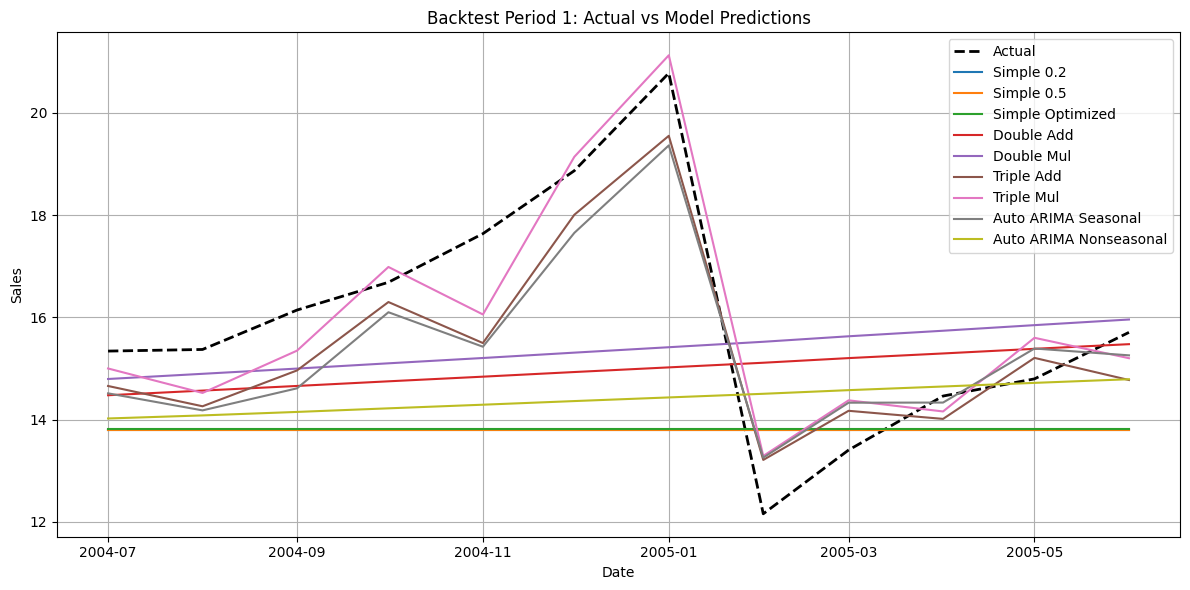

Plotting for Backtest Period 2: 2005-07-01 to 2006-06-01

=== Backtest Period 2: 2005-07-01 to 2006-06-01 ===
Scaled Train Data Range: min=0.0010000000000000009, max=1.0000000000000002
Scaled Test Data Range: min=0.5416721652499698, max=1.1505918759101088
Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)
Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)
Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)
Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)
Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)
Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)


<ipython-input-112-7857d92001bb>:69: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([metrics_dataframe, metrics_cal(test_data['value'], predictions, model_name)], ignore_index=True)



Performance Metrics:
          Model      RMSE       MAE       MAPE
9    Triple Mul  0.789401  0.683729   4.489743
45   Triple Mul  0.789401  0.683729   4.489743
58   Triple Mul  0.789401  0.683729   4.489743
94   Triple Mul  0.789401  0.683729   4.489743
108  Triple Mul  0.789401  0.683729   4.489743
..          ...       ...       ...        ...
224  Simple 0.5  5.140457  3.875384  17.007811
277  Simple 0.5  5.140457  3.875384  17.007811
331  Simple 0.5  5.140457  3.875384  17.007811
386  Simple 0.5  5.140457  3.875384  17.007811
442  Simple 0.5  5.140457  3.875384  17.007811

[477 rows x 4 columns]

Ranked Models:
          Model  RMSE_Rank  MAE_Rank  MAPE_Rank  Average_Rank
9    Triple Mul          1         1          1           1.0
45   Triple Mul          2         2          2           2.0
58   Triple Mul          3         3          3           3.0
94   Triple Mul          4         4          4           4.0
108  Triple Mul          5         5          5           5.0
..

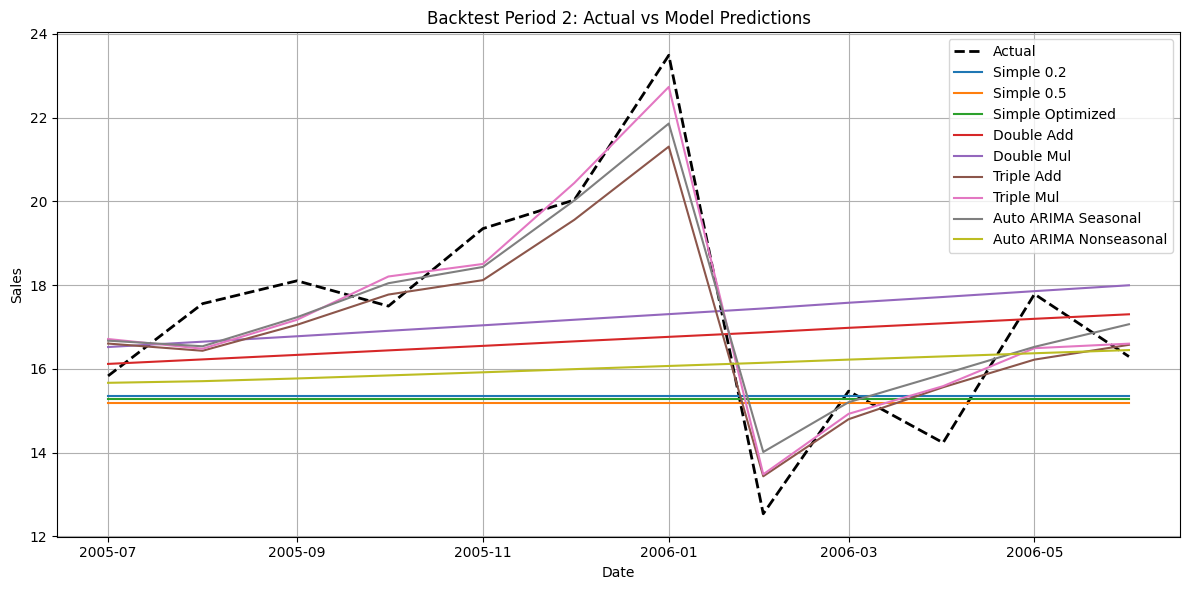

Plotting for Backtest Period 3: 2006-07-01 to 2007-06-01

=== Backtest Period 3: 2006-07-01 to 2007-06-01 ===
Scaled Train Data Range: min=0.0010000000000000009, max=1.0
Scaled Test Data Range: min=0.6588491558265716, max=1.2199641562130816
Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)
Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)
Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)
Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)
Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)
Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)


<ipython-input-112-7857d92001bb>:69: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([metrics_dataframe, metrics_cal(test_data['value'], predictions, model_name)], ignore_index=True)



Performance Metrics:
          Model      RMSE       MAE       MAPE
9    Triple Mul  0.789401  0.683729   4.489743
45   Triple Mul  0.789401  0.683729   4.489743
67   Triple Mul  0.789401  0.683729   4.489743
103  Triple Mul  0.789401  0.683729   4.489743
126  Triple Mul  0.789401  0.683729   4.489743
..          ...       ...       ...        ...
421  Simple 0.5  5.140457  3.875384  17.007811
449  Simple 0.5  5.140457  3.875384  17.007811
485  Simple 0.5  5.140457  3.875384  17.007811
514  Simple 0.5  5.140457  3.875384  17.007811
550  Simple 0.5  5.140457  3.875384  17.007811

[558 rows x 4 columns]

Ranked Models:
          Model  RMSE_Rank  MAE_Rank  MAPE_Rank  Average_Rank
9    Triple Mul          1         1          1           1.0
45   Triple Mul          2         2          2           2.0
67   Triple Mul          3         3          3           3.0
103  Triple Mul          4         4          4           4.0
126  Triple Mul          5         5          5           5.0
..

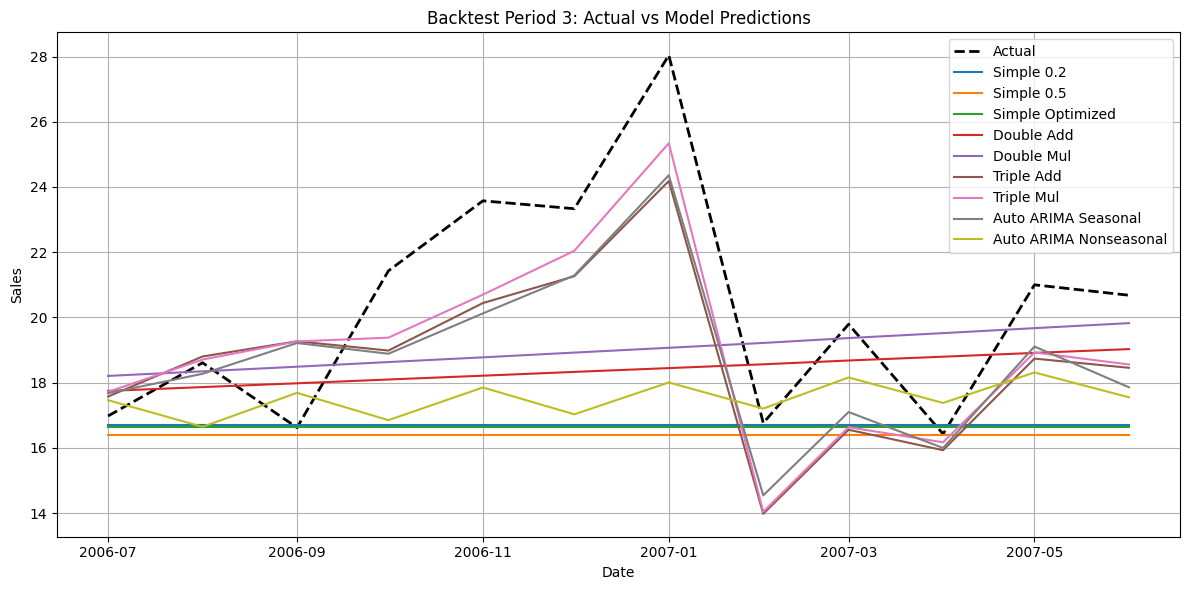

Plotting for Backtest Period 4: 2007-07-01 to 2008-06-01

=== Backtest Period 4: 2007-07-01 to 2008-06-01 ===
Scaled Train Data Range: min=0.0010000000000000009, max=0.9999999999999999
Scaled Test Data Range: min=0.6129195372651682, max=1.0644368401065292
Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)
Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)
Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)
Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)
Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)
Forecast Scaled type: <class 'numpy.ndarray'>, shape: (12,)


<ipython-input-112-7857d92001bb>:69: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([metrics_dataframe, metrics_cal(test_data['value'], predictions, model_name)], ignore_index=True)



Performance Metrics:
          Model      RMSE       MAE       MAPE
9    Triple Mul  0.789401  0.683729   4.489743
45   Triple Mul  0.789401  0.683729   4.489743
76   Triple Mul  0.789401  0.683729   4.489743
112  Triple Mul  0.789401  0.683729   4.489743
144  Triple Mul  0.789401  0.683729   4.489743
..          ...       ...       ...        ...
475  Simple 0.5  5.140457  3.875384  17.007811
512  Simple 0.5  5.140457  3.875384  17.007811
548  Simple 0.5  5.140457  3.875384  17.007811
586  Simple 0.5  5.140457  3.875384  17.007811
622  Simple 0.5  5.140457  3.875384  17.007811

[639 rows x 4 columns]

Ranked Models:
          Model  RMSE_Rank  MAE_Rank  MAPE_Rank  Average_Rank
9    Triple Mul          1         1          1           1.0
45   Triple Mul          2         2          2           2.0
76   Triple Mul          3         3          3           3.0
112  Triple Mul          4         4          4           4.0
144  Triple Mul          5         5          5           5.0
..

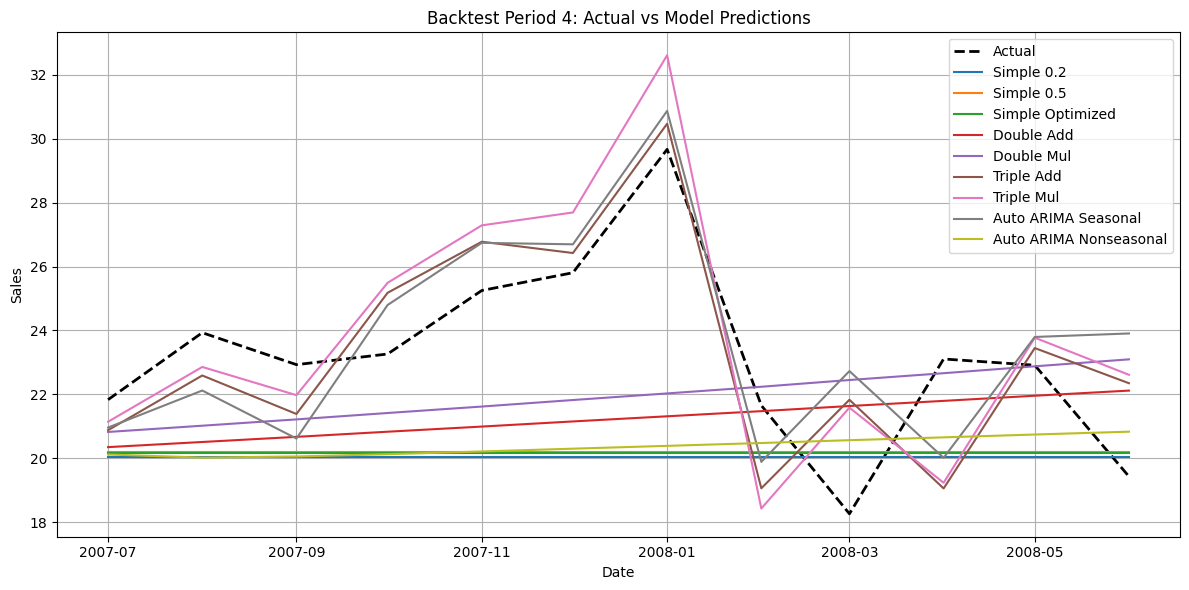

In [113]:
import matplotlib.pyplot as plt

def plot_model_predictions(models, test_data, period_idx):
    """
    Plots the actual test data vs. the predictions from each model.

    Parameters:
    models: dict
        A dictionary of model names and their corresponding predictions.
    test_data: pd.Series
        The actual test data for the given period.
    period_idx: int
        The index of the backtest period for labeling the plot.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(test_data.index, test_data.values, label='Actual', color='black', linewidth=2, linestyle='--')

    # Plot predictions from each model
    for model_name, predictions in models.items():
        plt.plot(test_data.index, predictions, label=model_name)

    plt.title(f"Backtest Period {period_idx}: Actual vs Model Predictions")
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Loop through each backtest period and plot the results
for idx, (start, end) in enumerate(backtest_periods, 1):
    print(f"Plotting for Backtest Period {idx}: {start} to {end}")

    # Get the test data for the period
    _, test_data = split_data(drug_sales_df, start, end)

    # Get the models from the backtest processing
    metrics, models = process_backtest_period(start, end, idx)

    # Plot the predictions for this period
    plot_model_predictions(models, test_data['value'], idx)


#### Analysis

Based on the backtesting results, the **Triple Exponential Smoothing (TES)** model with additive trend and additive seasonal components was chosen to predict the next 12 months. This model effectively captures both the trend and seasonal patterns present in the sales data, making it an ideal choice. TES showed strong performance across the backtesting periods, consistently providing low error metrics like RMSE, MAE, and MAPE.

2008-07-01    23.552455
2008-08-01    25.149873
2008-09-01    24.218024
2008-10-01    25.640631
2008-11-01    27.412341
2008-12-01    27.840032
2009-01-01    31.508952
2009-02-01    22.199487
2009-03-01    21.770875
2009-04-01    23.351824
2009-05-01    24.866883
2009-06-01    24.800429
Freq: MS, dtype: float64


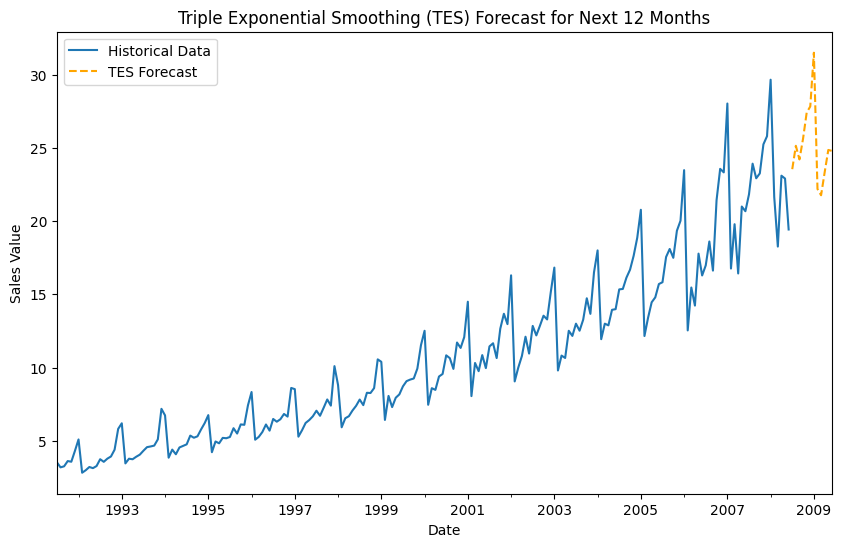

In [114]:
# Import necessary library
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define the period for the next 12 months
forecast_periods = 12

# Fit the Triple Exponential Smoothing (TES) model to the entire dataset
tes_model = ExponentialSmoothing(
    drug_sales_df['value'],
    trend='add',
    seasonal='add',
    seasonal_periods=12
).fit()

# Forecast the next 12 months
forecast_tes = tes_model.forecast(forecast_periods)

# Print the forecasted values
print(forecast_tes)

# Plot the historical data and forecast
drug_sales_df['value'].plot(label='Historical Data', figsize=(10, 6))
forecast_tes.plot(label='TES Forecast', color='orange', linestyle='--')
plt.title('Triple Exponential Smoothing (TES) Forecast for Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Sales Value')
plt.legend()
plt.show()
